# Predictive Analysis (House Pricing)

##  Load Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

In [70]:
from matplotlib.gridspec import GridSpec

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")

## Load Dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/fabi-cast/Predicting-house-prices/master/data/train.csv')

### Check dataset 

In [5]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,Y,SBrkr,896,896,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,1

### Data describe

In [12]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
for i in data.keys():
    p = data[i].isnull().sum()
    c = data[i].size
    if (p > 0):
        print(f"{i}: \t\t {data[i].isnull().sum()} :\t {(p/c)*100}")

LotFrontage: 		 259 :	 17.73972602739726
Alley: 		 1369 :	 93.76712328767123
MasVnrType: 		 8 :	 0.547945205479452
MasVnrArea: 		 8 :	 0.547945205479452
BsmtQual: 		 37 :	 2.5342465753424657
BsmtCond: 		 37 :	 2.5342465753424657
BsmtExposure: 		 38 :	 2.6027397260273974
BsmtFinType1: 		 37 :	 2.5342465753424657
BsmtFinType2: 		 38 :	 2.6027397260273974
Electrical: 		 1 :	 0.0684931506849315
FireplaceQu: 		 690 :	 47.26027397260274
GarageType: 		 81 :	 5.5479452054794525
GarageYrBlt: 		 81 :	 5.5479452054794525
GarageFinish: 		 81 :	 5.5479452054794525
GarageQual: 		 81 :	 5.5479452054794525
GarageCond: 		 81 :	 5.5479452054794525
PoolQC: 		 1453 :	 99.52054794520548
Fence: 		 1179 :	 80.75342465753424
MiscFeature: 		 1406 :	 96.30136986301369


###  Data cleaning

In [25]:
data.drop(columns = ["Alley", "PoolQC", "MiscFeature"], inplace = True)

In [26]:
data.drop('Fence', axis = 1, inplace = True)

In [28]:
for i in data.keys():
    p = data[i].isnull().sum()
    c = data[i].size
    if (p > 0):
        print(f"{i}: \t\t {data[i].isnull().sum()} :\t {(p/c)*100}")

LotFrontage: 		 259 :	 17.73972602739726
MasVnrType: 		 8 :	 0.547945205479452
MasVnrArea: 		 8 :	 0.547945205479452
BsmtQual: 		 37 :	 2.5342465753424657
BsmtCond: 		 37 :	 2.5342465753424657
BsmtExposure: 		 38 :	 2.6027397260273974
BsmtFinType1: 		 37 :	 2.5342465753424657
BsmtFinType2: 		 38 :	 2.6027397260273974
Electrical: 		 1 :	 0.0684931506849315
FireplaceQu: 		 690 :	 47.26027397260274
GarageType: 		 81 :	 5.5479452054794525
GarageYrBlt: 		 81 :	 5.5479452054794525
GarageFinish: 		 81 :	 5.5479452054794525
GarageQual: 		 81 :	 5.5479452054794525
GarageCond: 		 81 :	 5.5479452054794525


In [30]:
dataCopy = data.copy()

In [31]:
cols_NA = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1","BsmtFinType2", 
           "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [33]:
for col in cols_NA:
    dataCopy[col].fillna("NA", inplace = True)

In [36]:
for i in dataCopy.keys():
    p = dataCopy[i].isnull().sum()
    c = dataCopy[i].size
    if (p > 0):
        print(f"{i}: \t\t {dataCopy[i].isnull().sum()} :\t {(p/c)*100}")

LotFrontage: 		 259 :	 17.73972602739726
MasVnrType: 		 8 :	 0.547945205479452
MasVnrArea: 		 8 :	 0.547945205479452
Electrical: 		 1 :	 0.0684931506849315
GarageYrBlt: 		 81 :	 5.5479452054794525


In [37]:
for col in ["LotFrontage", "MasVnrArea"]:
    dataCopy[col].fillna(0, inplace = True)

In [38]:
for col in ["MasVnrType", "Electrical"]:
    dataCopy[col].fillna("None", inplace = True)

In [39]:
for i in dataCopy.keys():
    p = dataCopy[i].isnull().sum()
    c = dataCopy[i].size
    if (p > 0):
        print(f"{i}: \t\t {dataCopy[i].isnull().sum()} :\t {(p/c)*100}")

GarageYrBlt: 		 81 :	 5.5479452054794525


## Dataset Preparation

In [40]:
dataCopy.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [42]:
col_names = ({"Street": "Pave",
              "BldgType": "Property_Type",
              "HouseStyle": "Storeys",
              "Electrical": "Elect_system",
              "BsmtUnfSF": "BsmtArea_u",
              "TotalBsmt":"Bsmt_Total_Area",
              "1stFlrSF": "Area_1stFL",
              "2ndFlrSF": "Area_2ndFL",
              "LowQualFinSF": "LowQual_Area",
              "GrLivArea": "HighQual_Area",
               }
            )

dataCopy = dataCopy.rename(columns = col_names)

In [44]:
dataCopy.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [45]:
dataCopy["Neighborhood"] = data["Neighborhood"].str.replace("NAmes", "North Ames")

In [47]:
dataCopy["Pave"] = np.where(dataCopy["Pave"]== "Pave", 1, 0)

dataCopy["Utilities"]= np.where(dataCopy["Utilities"]== "NoSeWa", 0, 1)

dataCopy["CentralAir"] = np.where(dataCopy["CentralAir"]== "Y", 1, 0)

In [48]:
cat_qual = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
col_cat_qual = ["HeatingQC", "KitchenQual", "FireplaceQu", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "GarageQual"]

cat_lot = ["IR3", "IR2", "IR1", "Reg"] # ["LotShape"]

land_sl = ["Sev", "Mod", "Gtl"] # Landslope

pav_div = ["N", "P", "Y"] #["PavedDrive"]

bsm_ty = ["NA","Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"] #
col_bsm_ty =["BsmtFinType1", "BsmtFinType2"]

bsmt_exp = ["No", "Mn", "Av", "Gd"] #["BsmtExposure"]

cat_funct = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"] # Functional

In [49]:
def label_c(cat, col, data):
    """
    Labels with ordinals a col of a dataframe data by using the values in the category cat
    """
    categories = pd.Categorical(data[col], categories=cat, ordered=True)
    labels, unique = pd.factorize(categories, sort=True)
    data[col] = labels

In [50]:
for cols in col_cat_qual:
    label_c(cat_qual, cols, dataCopy)

In [51]:
dataCopy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Pave,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Property_Type,Storeys,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtArea_u,TotalBsmtSF,Heating,HeatingQC,CentralAir,Elect_system,Area_1stFL,Area_2ndFL,LowQual_Area,HighQual_Area,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,2,PConc,3,3,No,GLQ,706,Unf,0,150,856,GasA,4,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,1,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,1,2,CBlock,3,3,Gd,ALQ,978,Unf,0,284,1262,GasA,4,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,1,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,1,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,2,PConc,3,3,Mn,GLQ,486,Unf,0,434,920,GasA,4,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,1,IR1,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,1,2,BrkTil,2,4,No,ALQ,216,Unf,0,540,756,GasA,3,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,IR1,Lvl,1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,2,PConc,3,3,Av,GLQ,655,Unf,0,490,1145,GasA,4,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [52]:
for cols in col_bsm_ty:
    label_c(bsm_ty, cols, dataCopy)

In [53]:
label_c(cat_lot, "LotShape", dataCopy)
label_c(pav_div, "PavedDrive", dataCopy)
label_c(bsmt_exp, "BsmtExposure", dataCopy)
label_c(cat_funct, "Functional", dataCopy)
label_c(land_sl, "LandSlope", dataCopy) # Landslope

In [54]:
dataCopy.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [56]:
dataCopy[["GarageYrBlt"]].dtypes

GarageYrBlt    float64
dtype: object

In [57]:
dataCopy["GarageYrBlt"]= dataCopy["GarageYrBlt"].fillna(0.0).astype(int)

In [58]:
def detect_low_variance(data, col, perc):
    min_val = data[col].min()
    perc_val = np.percentile(data[col], perc)
    return min_val == perc_val

In [60]:
low_var = [col for col in dataCopy.select_dtypes(include = [np.number]).columns if detect_low_variance(dataCopy, col, 90)]


In [61]:
low_var

['LowQual_Area',
 'BsmtHalfBath',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [63]:
dataCopy = dataCopy.drop(low_var, axis=1)

In [65]:
dataCopy["GLA"] = dataCopy["Area_1stFL"] + dataCopy["Area_2ndFL"]
dataCopy["GBA"]= dataCopy["GLA"] + dataCopy["TotalBsmtSF"] + dataCopy["GarageArea"]

In [67]:
dataCopy["no_bathrooms"] = dataCopy["BsmtFullBath"] + dataCopy["FullBath"] + dataCopy["HalfBath"]
dataCopy.drop(columns = ["BsmtFullBath","FullBath","HalfBath"], axis = 1, inplace= True)

In [69]:
dataCopy.no_bathrooms.describe()

count    1460.000000
mean        2.373288
std         0.920991
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: no_bathrooms, dtype: float64

### sale price and affectors analysis [ GLA,GBA]

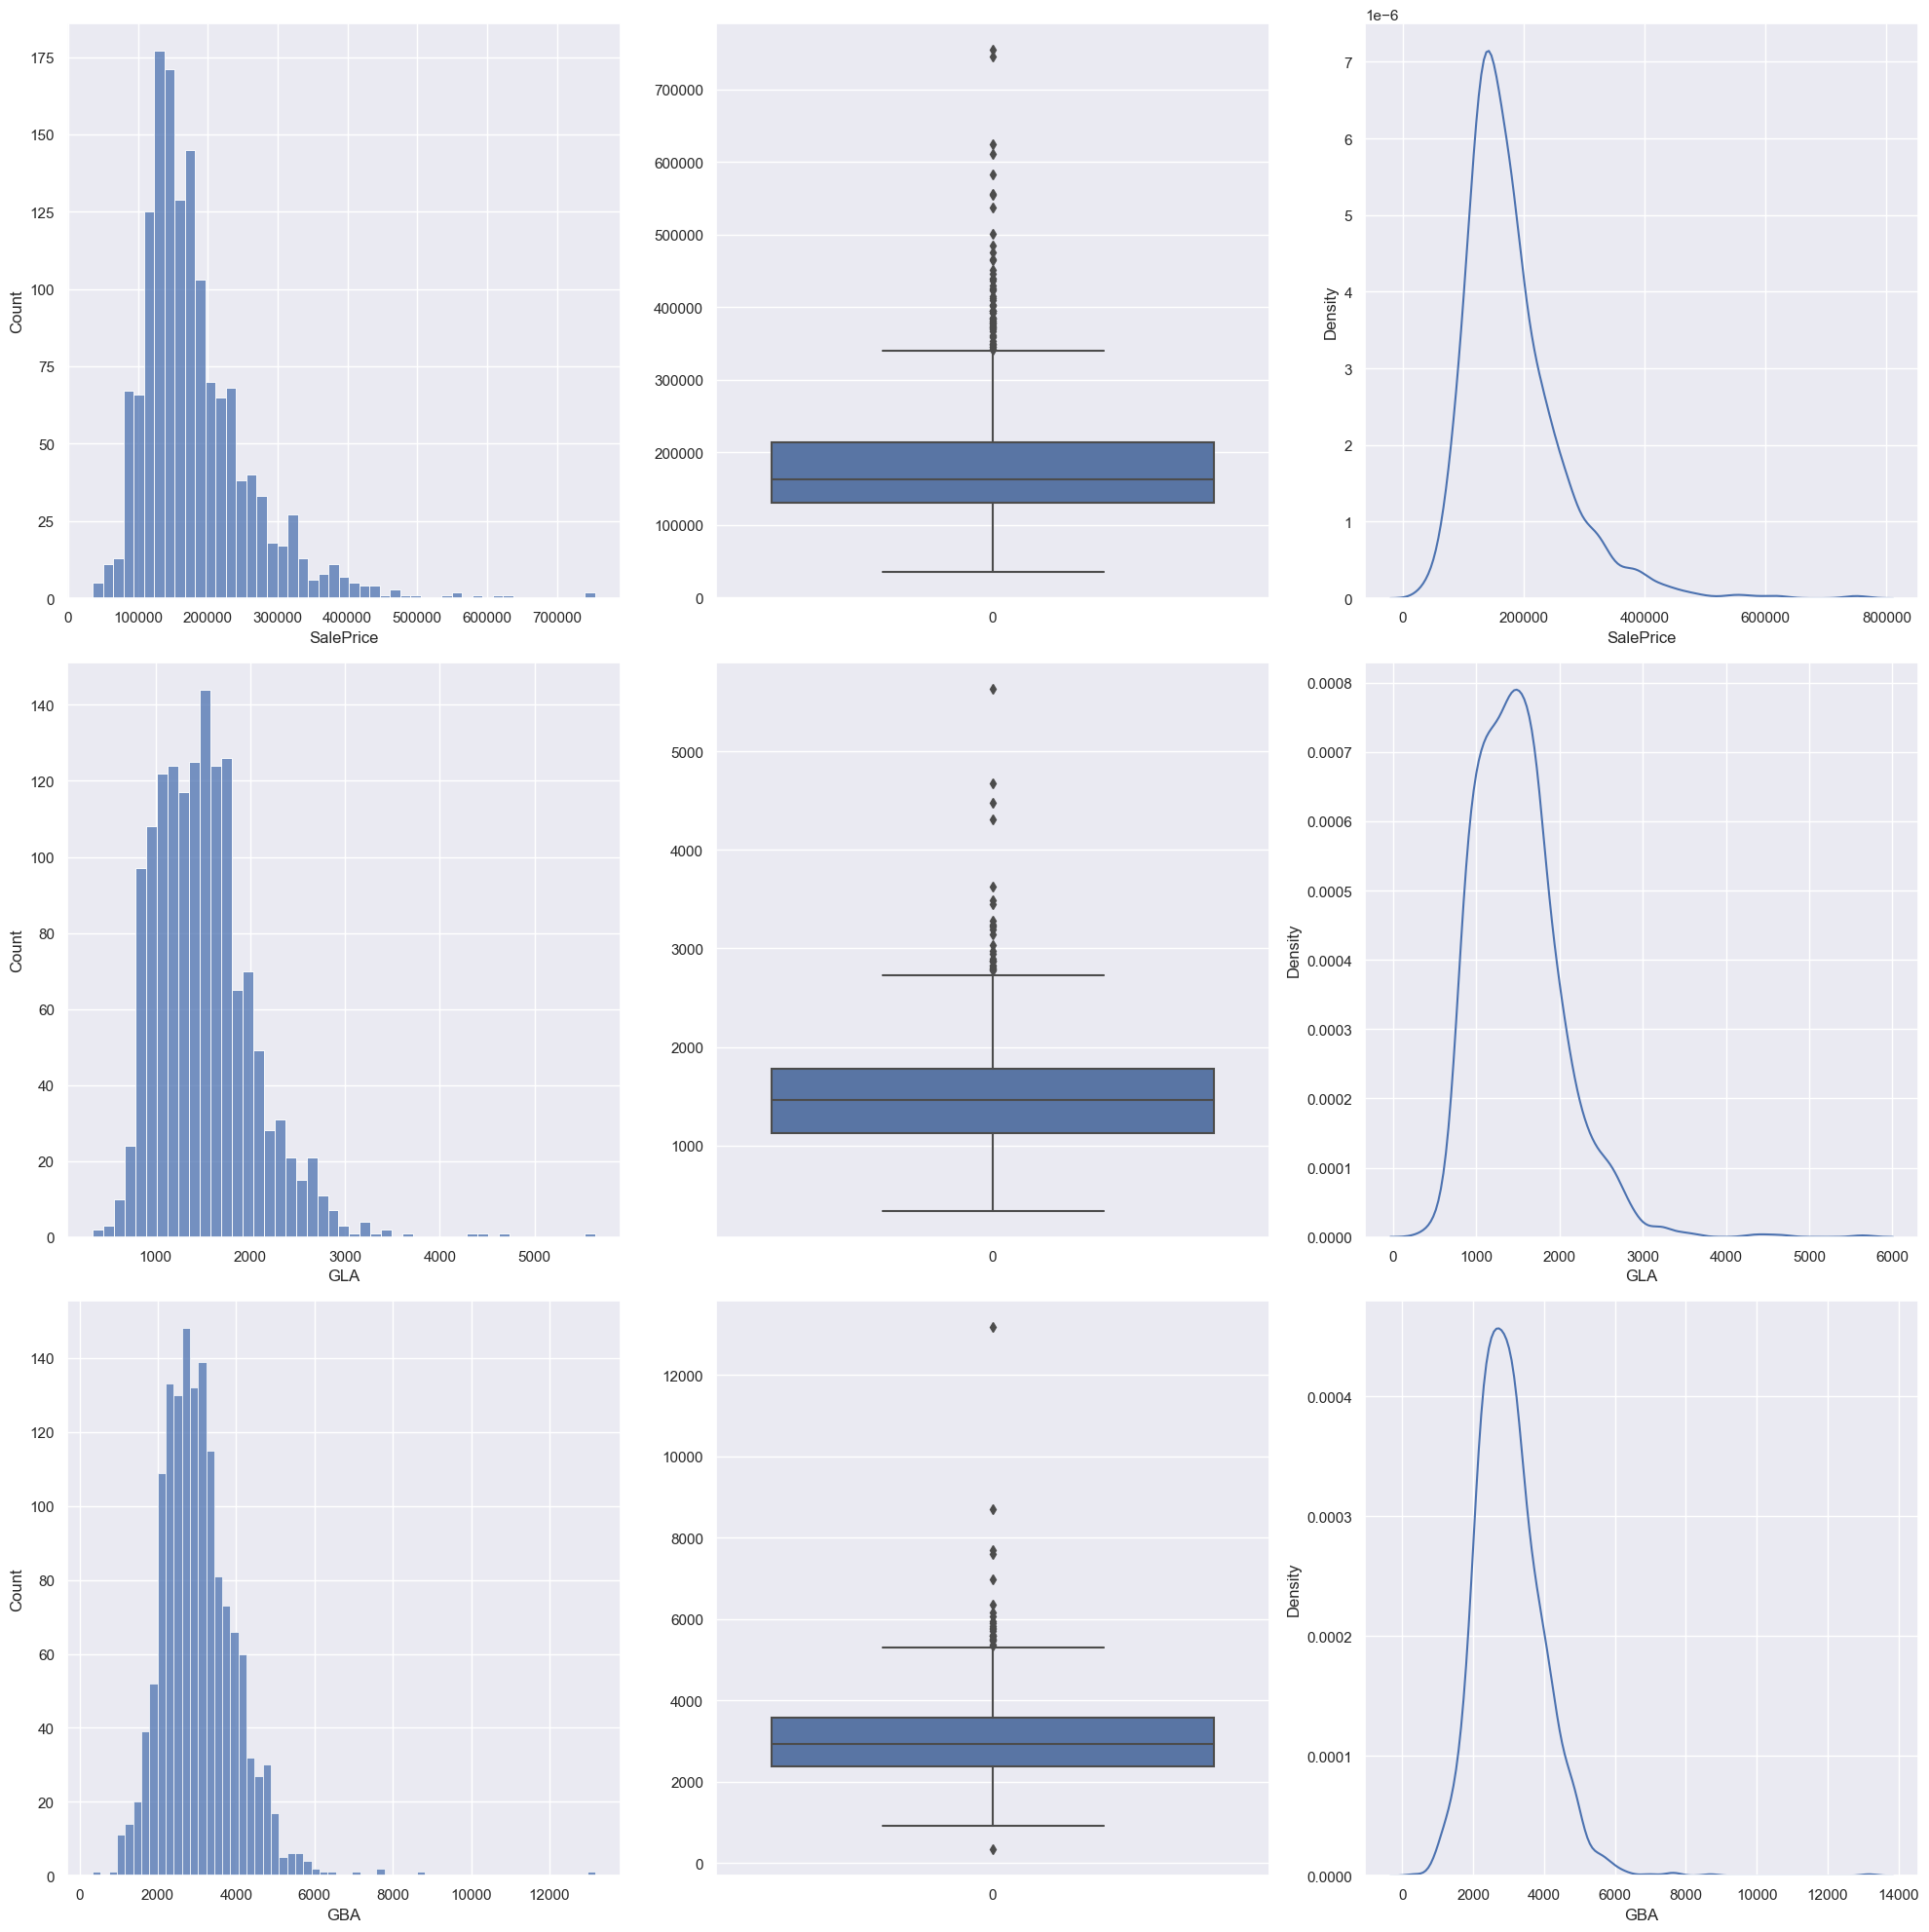

In [89]:
fig = plt.figure(figsize = (20,20))

gs = GridSpec(3,3, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])
ax9 = fig.add_subplot(gs[2,2])

sns.histplot(dataCopy['SalePrice'], ax = ax1)
sns.boxplot(dataCopy['SalePrice'], ax = ax2)
sns.kdeplot(dataCopy['SalePrice'], ax = ax3)

sns.histplot(dataCopy['GLA'], ax = ax4)
sns.boxplot(dataCopy['GLA'], ax = ax5)
sns.kdeplot(dataCopy['GLA'], ax = ax6)

sns.histplot(dataCopy['GBA'], ax = ax7)
sns.boxplot(dataCopy['GBA'], ax = ax8)
sns.kdeplot(dataCopy['GBA'], ax = ax9)

fig.tight_layout()

plt.show()

In [90]:
dataCopy["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [91]:
dataCopy["GBA"].describe()

count     1460.000000
mean      3040.028767
std        958.651371
min        334.000000
25%       2388.000000
50%       2934.000000
75%       3570.750000
max      13170.000000
Name: GBA, dtype: float64

In [92]:
dataCopy["GLA"].describe()

count    1460.000000
mean     1509.619178
std       521.163523
min       334.000000
25%      1123.750000
50%      1458.000000
75%      1775.250000
max      5642.000000
Name: GLA, dtype: float64

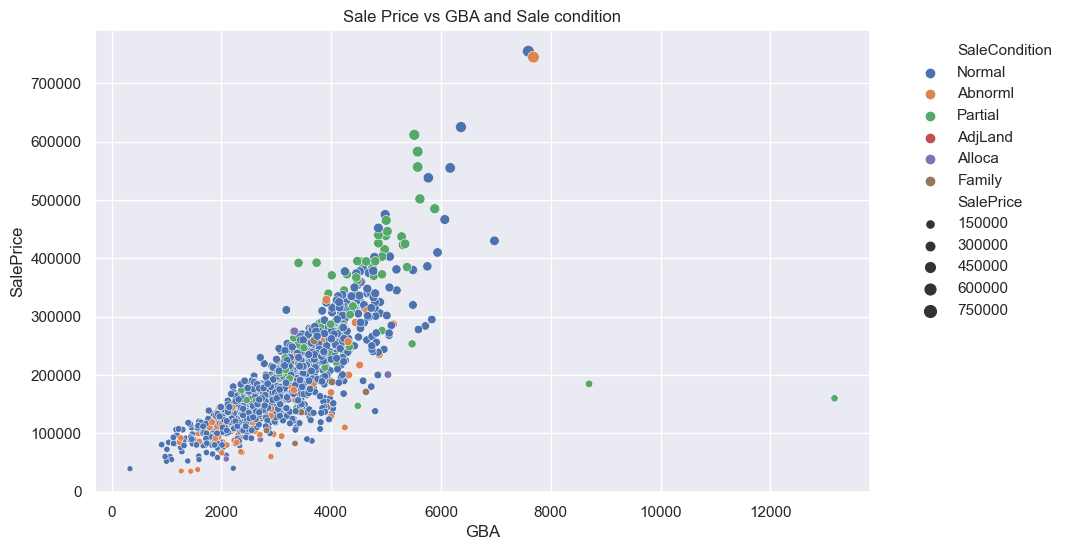

In [93]:
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data = dataCopy,
                x = "GBA",
                y = "SalePrice",
                hue= "SaleCondition",
                size = "SalePrice",
                ax= ax).legend(bbox_to_anchor=(1.04,1), loc="upper left",frameon= False)
ax.set_title("Sale Price vs GBA and Sale condition");

In [94]:
train = dataCopy[dataCopy.SaleCondition== "Normal"].copy()
train.drop(columns = ["SaleCondition"], inplace= True)

In [95]:
def iqr(data, cols, t):
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3-Q1
    low_bound = {}
    upp_bound = {}
    for col in list(IQR.index):
        low_bound[col] = Q1[col]-t*IQR[col]
        upp_bound[col] = Q3[col]+t*IQR[col]
    return {"low_b": low_bound, "upp_b": upp_bound}       

In [96]:
iqr_d = iqr(train,["GarageArea", "GLA", "GBA", "SalePrice", "HighQual_Area"] , 1.5)
iqr_d

{'low_b': {'GarageArea': -77.625,
  'GLA': 107.375,
  'GBA': 703.625,
  'SalePrice': 17500.0,
  'HighQual_Area': 126.25},
 'upp_b': {'GarageArea': 963.375,
  'GLA': 2752.375,
  'GBA': 5152.625,
  'SalePrice': 317500.0,
  'HighQual_Area': 2750.25}}

In [97]:
for col in ["GarageArea", "GLA", "GBA", "SalePrice", "HighQual_Area"]:
    train = train[~((train[col]< iqr_d["low_b"][col]) | (train[col]> iqr_d["upp_b"][col]))]

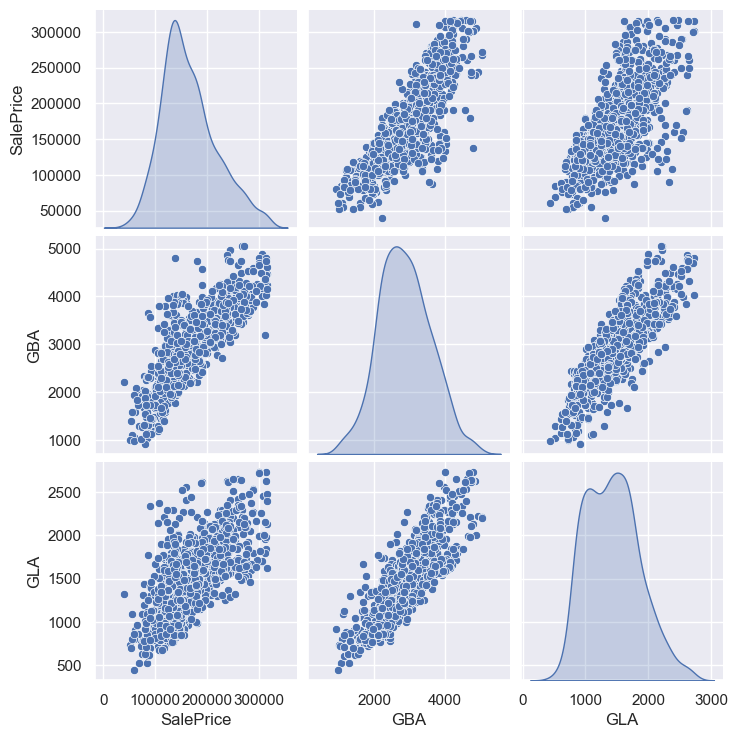

In [98]:
sns.pairplot(data = train,
             diag_kind="kde",
             vars =["SalePrice", "GBA", "GLA"]);

In [99]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Pave,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Property_Type,Storeys,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtArea_u,TotalBsmtSF,Heating,HeatingQC,CentralAir,Elect_system,Area_1stFL,Area_2ndFL,HighQual_Area,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SalePrice,GLA,GBA,no_bathrooms
0,1,60,RL,65.0,8450,1,3,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,2,PConc,3,3,0,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,1710,3,1,2,8,6,0,0,Attchd,2003,RFn,2,548,3,TA,2,0,61,0,2,2008,WD,208500,1710,3114,4
1,2,20,RL,80.0,9600,1,3,Lvl,1,FR2,2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,1,2,CBlock,3,3,3,5,978,1,0,284,1262,GasA,4,1,SBrkr,1262,0,1262,3,1,1,6,6,1,3,Attchd,1976,RFn,2,460,3,TA,2,298,0,0,5,2007,WD,181500,1262,2984,2
2,3,60,RL,68.0,11250,1,2,Lvl,1,Inside,2,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,2,PConc,3,3,1,6,486,1,0,434,920,GasA,4,1,SBrkr,920,866,1786,3,1,2,6,6,1,3,Attchd,2001,RFn,2,608,3,TA,2,0,42,0,9,2008,WD,223500,1786,3314,4
4,5,60,RL,84.0,14260,1,2,Lvl,1,FR2,2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,2,PConc,3,3,2,6,655,1,0,490,1145,GasA,4,1,SBrkr,1145,1053,2198,4,1,2,9,6,1,3,Attchd,2000,RFn,3,836,3,TA,2,192,84,0,12,2008,WD,250000,2198,4179,4
5,6,50,RL,85.0,14115,1,2,Lvl,1,Inside,2,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,1,2,Wood,3,3,0,6,732,1,0,64,796,GasA,4,1,SBrkr,796,566,1362,1,1,1,5,6,0,0,Attchd,1993,Unf,2,480,3,TA,2,40,30,0,10,2009,WD,143000,1362,2638,3


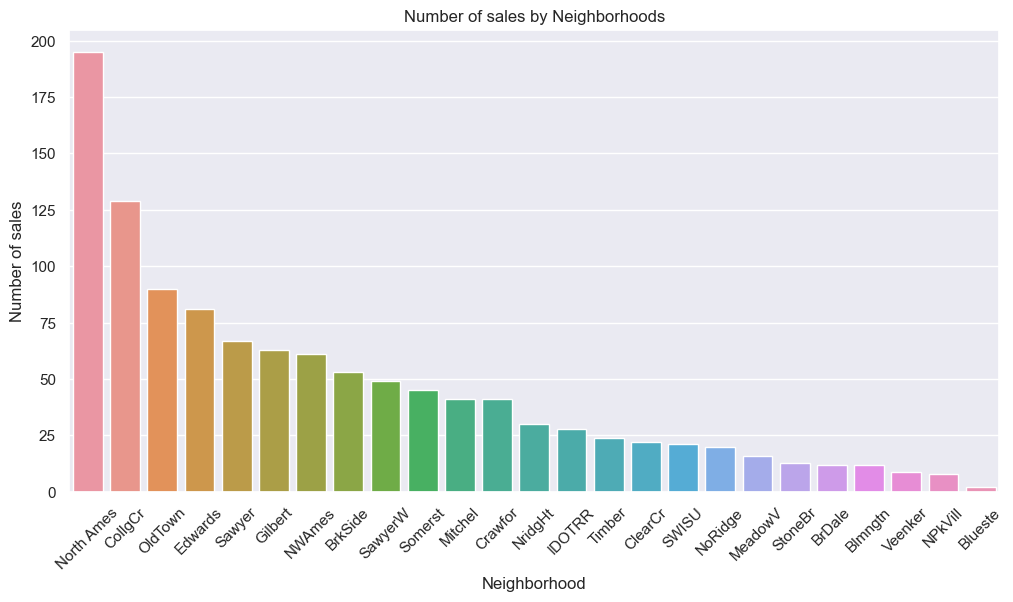

In [100]:
neigh= list(train.Neighborhood.value_counts().index)
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data = train,
              x= "Neighborhood",
              order= neigh,
              orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.set_title('Number of sales by Neighborhoods')
ax.set_ylabel('Number of sales', fontsize=12);
ax.set_xlabel('Neighborhood', fontsize=12);

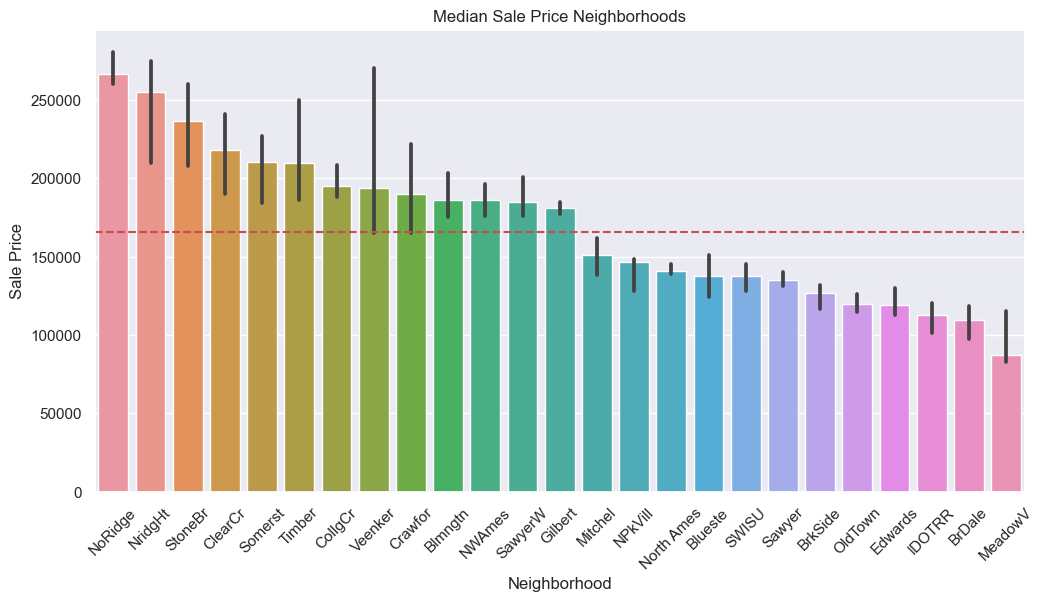

In [101]:
medians = (train[["Neighborhood", "SalePrice"]].groupby("Neighborhood")
                                               .median()
                                               .sort_values("SalePrice", ascending = False)
                                               .reset_index())


fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data = train,
            x= "Neighborhood",
            y= "SalePrice",
            estimator = np.median,
            order = list(medians["Neighborhood"])).set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.axhline(train.SalePrice.mean(), ls='--', color = "r")
ax.set_title('Median Sale Price Neighborhoods')
ax.set_ylabel('Sale Price', fontsize=12);
ax.set_xlabel('Neighborhood', fontsize=12);

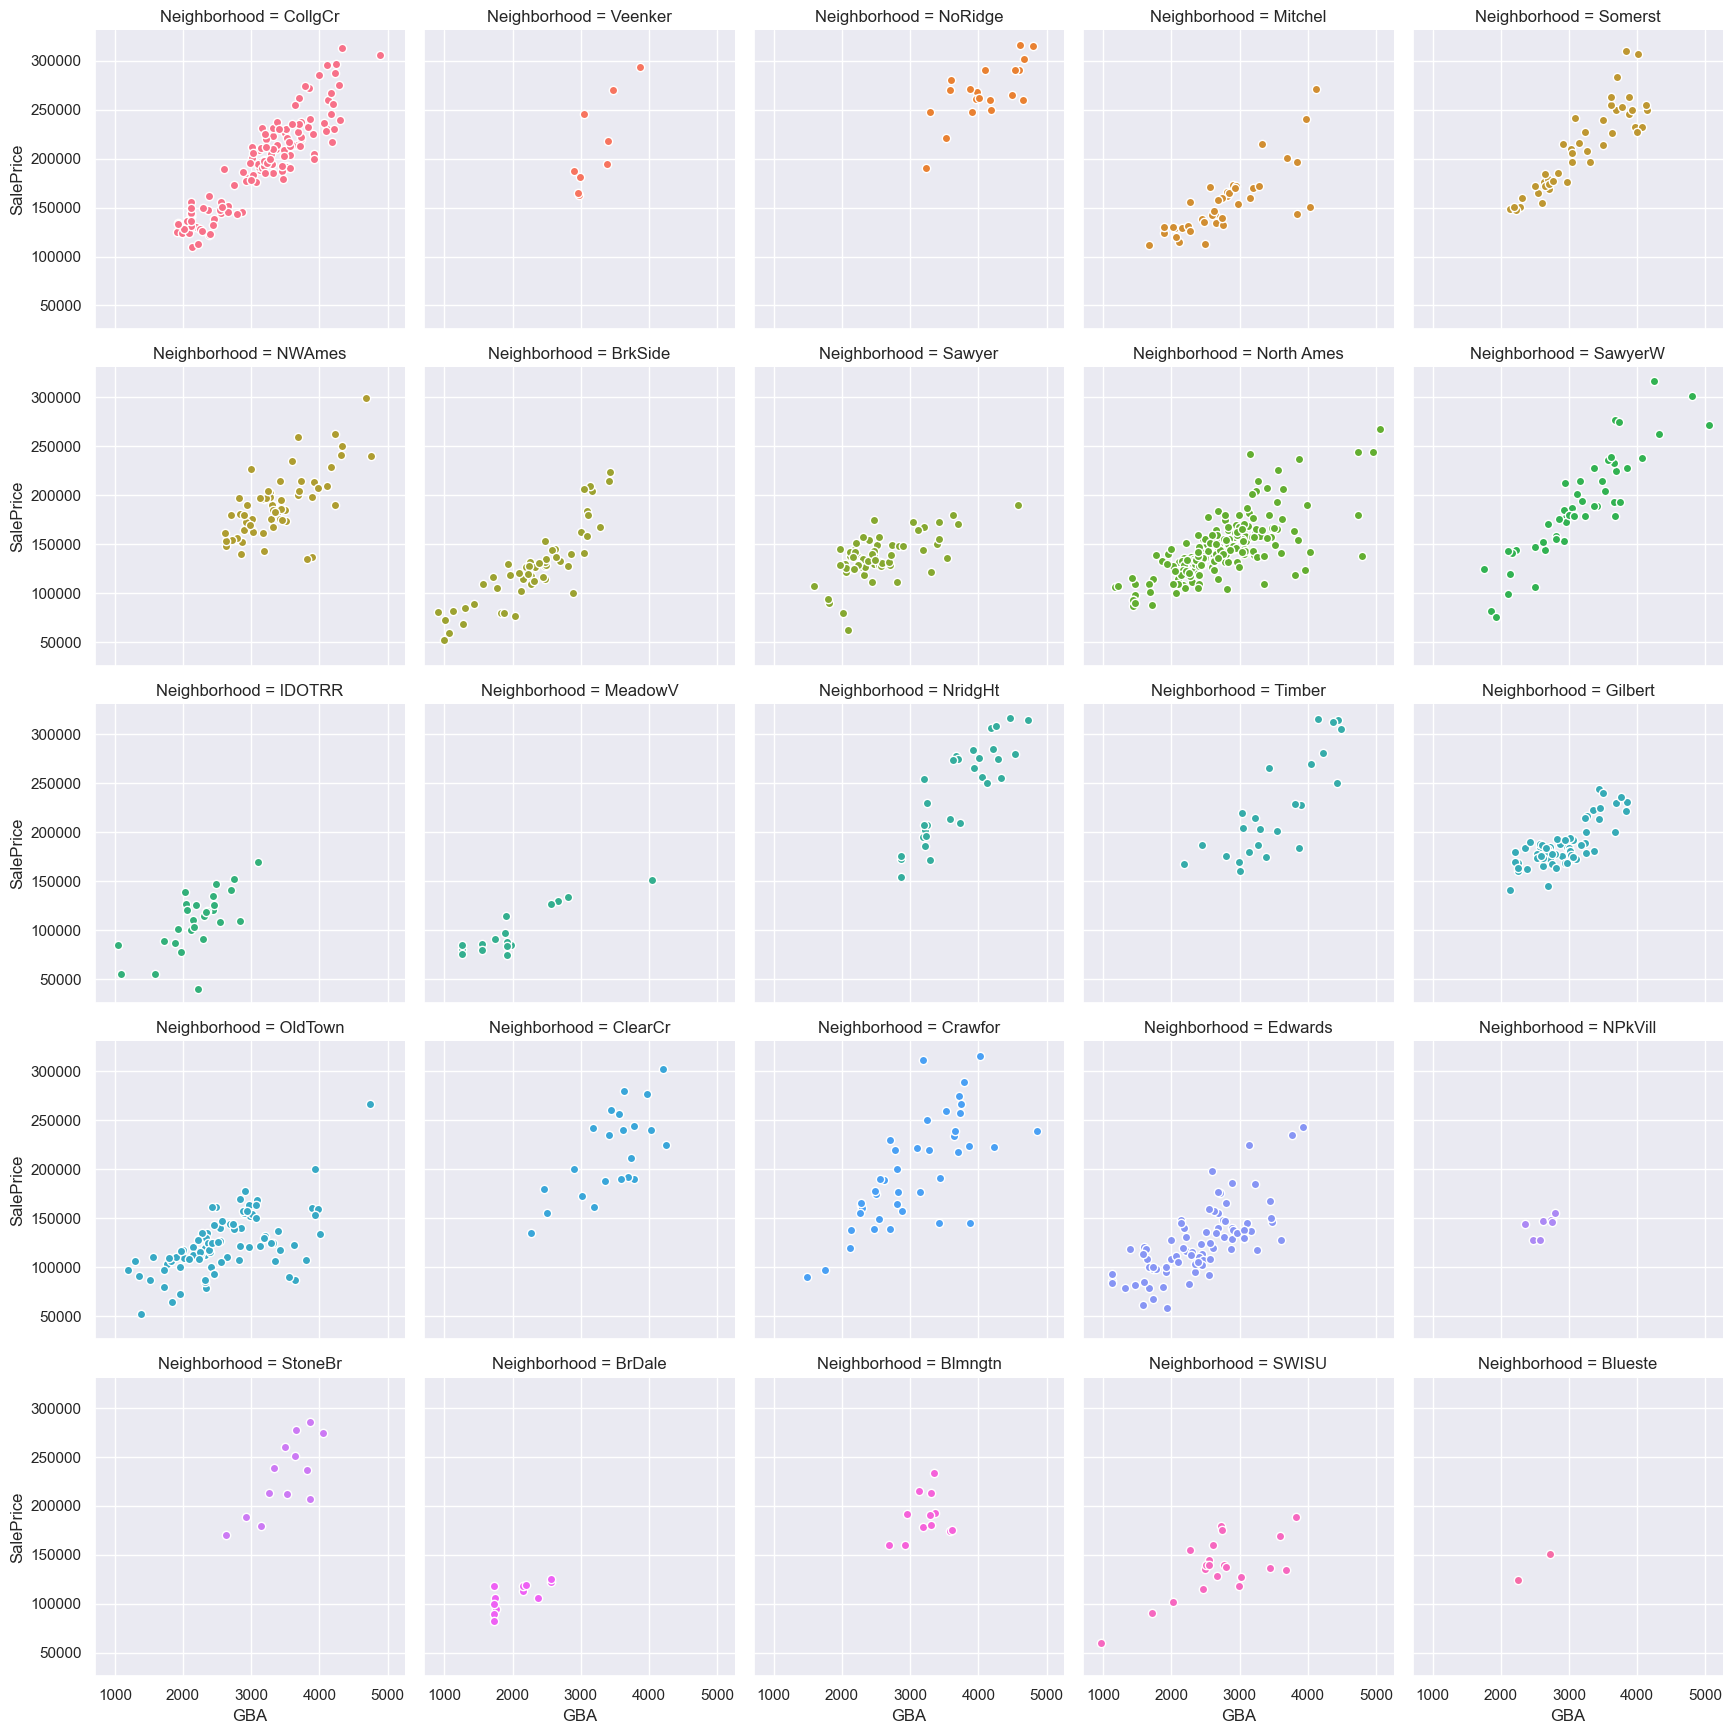

In [102]:
g = sns.FacetGrid(data = train,
                  col = "Neighborhood",
                  hue = "Neighborhood",
                  col_wrap = 5,
                  height= 3.5)
g = g.map(plt.scatter, "GBA", "SalePrice", edgecolor="w")
